Hello Data People i have tried to keep the Kernel as informative as possible ,if you like it leave a upvote ,it really motivates.

**Loan Prediction Model**

Lets first through some light on what a loan is actually.
1. A loan is when money is given to another party in exchange for repayment of the loan principal amount plus interest.
2. Loan terms are agreed to by each party before any money is advanced.
3. A loan may be secured by collateral such as a mortgage or it may be unsecured such as a credit card.
4. Revolving loans or lines can be spent, repaid, and spent again, while term loans are fixed-rate, fixed-payment loans.

**Why there is a need to create a loan prediction model??**

I believe that when a bank lends a loan to a customer there are many factors which a bank see in order to be sure that will the customer will be able to pay the loan back or not.its easy for a bank if there are less number of people applying for the loan but as we know this is the 20th-century everyday bank will be receiving hundreds of loan request and to make the process easy we can apply Data Science in order for much smoother and Data drove decisions which can increase the chances of the bank to know whom to lend the loan and who are volatile not to lend.

**Business Problem**

Here I am defining a Business problem as without a problem there is no solution, banks want to simplify the loan process and make it more smooth and want to classify people to whom to lend and whom not to.

**Data Source**

The Data have been taken from Kaggle ,the kingdom of Data people.

What we will be doing though this Model Building.

1. We will first analyse the Data and try to understand the Features/variables.
2. We will then Visualize the Data for better understanding.
3. We will then use the Machine Learning methods to Train and predict.
4. At last we will define at what accuracy we can classify correctly.

**Importing The Library And Data**

Now we will import the libraries each one has a specific role to play.

**Pandas:** pandas is a library written for the Python programming language for data manipulation and analysis.

**Numpy:** NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays

**Seaborn:** Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

**Matplotlib:** Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
Loan_data=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [4]:
Loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Exploratory Data Analysis**

Now first check the size of the Data.

In [5]:
Loan_data.shape 

(614, 13)

#There is a short way to EDA the data its given below if you like you can use it as it will do all the EDA for you and will give you a output in the HTML format.


'''pip install pandas-profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(Loan_data)
prof.to_file(output_file='output.html')'''

Now the best step is to look out what is the data types of the features ,if there is some missing values,how much values are there in the feature/variable.

In [6]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


now lets check how many null values are present in our data.

In [7]:
Loan_data.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

As,we can see we have a Loan_ID as a variable it does not provide any insight about the Data ,so we will remove it.

In [8]:
Loan_data.drop("Loan_ID",axis=1,inplace=True)

Now ,we would like to the the statistics like Count,mean,mode,stf,quantiles..etc. of all our our Features/Variables.

In [9]:
Loan_data.describe(include="all")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


Lets,see what are the name of the columns of our Data Frame.

In [10]:
Loan_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**Plotting and finding Insights.**

As,we know the credit History Variable is object type lets convert it into object.

In [11]:
Loan_data['Credit_History']=Loan_data["Credit_History"].astype("object")

Checking if there are any dublicates.

In [12]:
Loan_data.duplicated().any()

False

The Below plot is a countplot of Loan_status.

* Here we can see there are more cases of rejecting a loan and less case of actually acepting a loan.

* Approximately loan accept is less then 50% of the loan rejected in the Bank.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

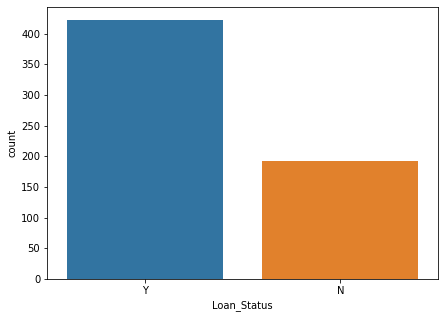

In [13]:
plt.figure(figsize=(7,5))
sns.countplot(Loan_data["Loan_Status"])

This is the countplot(frequency of Data) of Credit History with Loan Status devided in the Facetgrid.

* The people who have a credit score 1 have a better chance to get a loan.

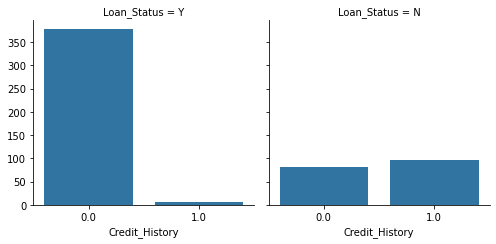

In [14]:
#Credit_History
grid=sns.FacetGrid(Loan_data,col="Loan_Status",size=3.5)
grid.map(sns.countplot,"Credit_History")

this is the countplot of the gender with their loan Status.

* Most of the people who got the loan are Male,Female stays low in both the case.


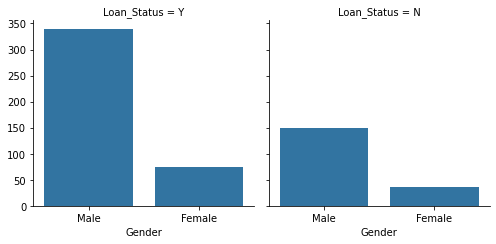

In [15]:
#Gender
grid=sns.FacetGrid(Loan_data,col="Loan_Status",size=3.5)
grid.map(sns.countplot,"Gender")

This is the countplot of marriage with their loan status.

* Most of the people who got the loan is Married.

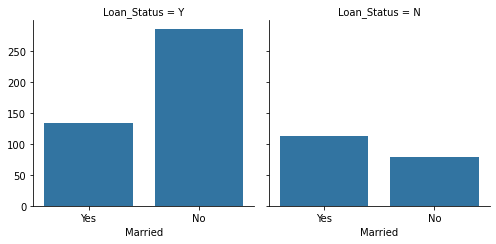

In [16]:
#Marriage
grid=sns.FacetGrid(Loan_data,col="Loan_Status",size=3.5)
grid.map(sns.countplot,"Married")

<AxesSubplot:xlabel='Married', ylabel='count'>

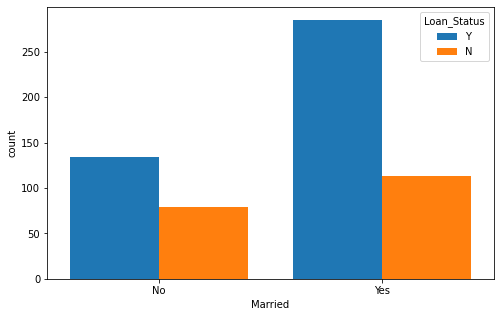

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x=Loan_data['Married'],hue=Loan_data["Loan_Status"],saturation=5)

this is the countplot of the dependents with their loan Status.

* Most of the poeple who got the loan has 0 dependents.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

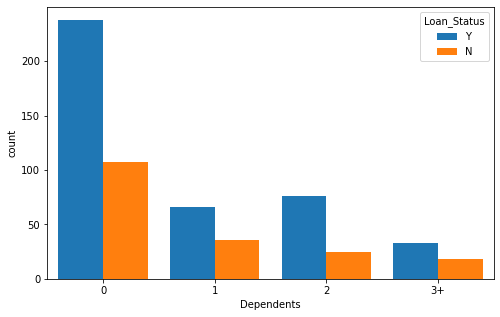

In [18]:
#dependents 
plt.figure(figsize=(8,5))
sns.countplot(x="Dependents",hue="Loan_Status",data=Loan_data,saturation=5)

this countplot of Education with there loan Status show that:

* most of the people who got the loan is Graduate.

<AxesSubplot:xlabel='Education', ylabel='count'>

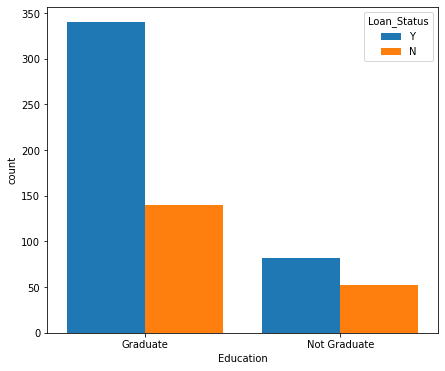

In [19]:
#Education
plt.figure(figsize=(7,6))
sns.countplot(x="Education",hue="Loan_Status",data=Loan_data,saturation=5)

this countplot of self employed with their loan status shows that:

* most of the peopel who got the loan is  not self employed.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

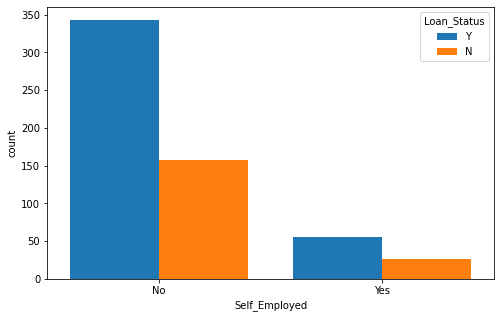

In [20]:
#Self employed
plt.figure(figsize=(8,5))
sns.countplot(x="Self_Employed",hue="Loan_Status",data=Loan_data,saturation=5)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

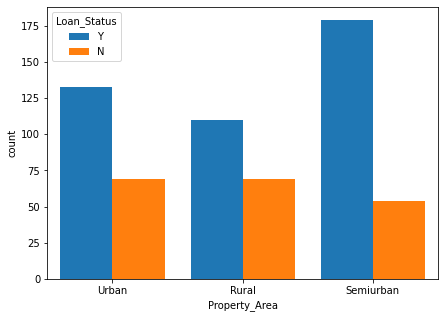

In [21]:
#property area 
plt.figure(figsize=(7,5))
sns.countplot(x="Property_Area",hue="Loan_Status",data=Loan_data,saturation=5)

In [22]:
Loan_mean_amount = Loan_data.groupby(['Property_Area','Education'])['LoanAmount'].mean().reset_index()
Loan_mean_amount

,Property_Area,Education,LoanAmount
0,Rural,Graduate,163.023622
1,Rural,Not Graduate,122.543478
2,Semiurban,Graduate,152.587912
3,Semiurban,Not Graduate,117.478261
4,Urban,Graduate,148.480769
5,Urban,Not Graduate,114.200000


in this barplot we cab see it is grouped by property area and then by education ,which is the plotted by average loan amount on y axis.

* it gives out the insight that:

* Graduate people in all the property area are taking off a high amount of average loan amount. 

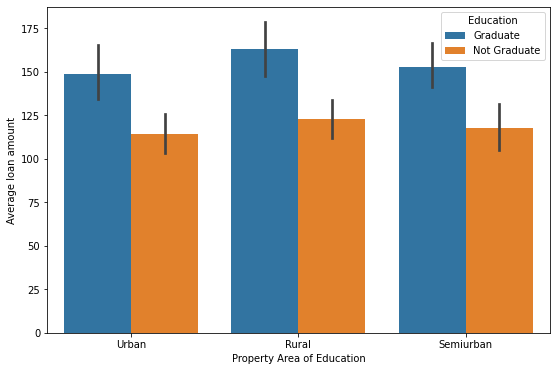

In [23]:
plt.figure(figsize=(9,6))
sns.barplot(x='Property_Area',y='LoanAmount',hue='Education',data=Loan_data)
plt.xlabel("Property Area of Education")
plt.ylabel("Average loan amount")
plt.show()

lets work on the cateagorical data and numerical data seperately now .

In [24]:
cateagorical_data=[]
Numerical_data=[]

for i,c in enumerate(Loan_data.dtypes):
  if c==object:
    cateagorical_data.append(Loan_data.iloc[:,i])
  else:
      Numerical_data.append(Loan_data.iloc[:,i])

In [25]:
cateagorical_data=pd.DataFrame(cateagorical_data).transpose()
Numerical_data=pd.DataFrame(Numerical_data).transpose()

Now lets see how our Cateagorical Data looks like.

In [26]:
cateagorical_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1,Urban,Y
1,Male,Yes,1,Graduate,No,1,Rural,N
2,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,Male,No,0,Graduate,No,1,Urban,Y


Now lets take a look in Numerical Data we have.

In [27]:
Numerical_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0



Now,here we want to fill our Null values in the Cateagorical Data by the most number of repeated values in that Feature Column.

In [28]:
cateagorical_data=cateagorical_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cateagorical_data.isnull().sum().any()

False

Now,in Case of our Numerical Data we will will the Null values with the Help of Mean of that Feature/variable Column because an average explains the Data more precisely.

In [29]:
Numerical_data=Numerical_data.apply(lambda x:x.fillna(x.mean()))
Numerical_data.isnull().sum().any()

False

Now we will import our LabelEncoder so that we can encode our Cateagorical Data into the o and 1 so that further it will be easy to know the correlation among them with the help of correlation matrix.

In [30]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

Label_value={"Y":0,"N":1}
Label=cateagorical_data["Loan_Status"]
cateagorical_data.drop("Loan_Status",axis=1,inplace=True)
Label=Label.map(Label_value)

Here,using the fit_transform we are applying the Label_encoding in one go with fitting and transforming.

In [31]:
for i in cateagorical_data:
  cateagorical_data[i]=LE.fit_transform(cateagorical_data[i])

Now,lets see how our Cateagorical Data looks like.

In [32]:
cateagorical_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2


Checking the Labels,which is our dependent variables.

In [33]:
Label

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Loan_Status, Length: 614, dtype: int64

Now,we will coccat all the Cateagorical data,Numerical Data and label to form a single Data frame named Loan Data.

In [34]:
Loan_data=pd.concat([cateagorical_data,Numerical_data,Label],axis=1)

Now let us plot the correlation matrix.

* We have seen no feature pose a high correlation with any other feature so there is no need to club or remove any feature.

* Though loan amount and application income have a good correation.

<AxesSubplot:title={'center':'Correlation Matrix'}>

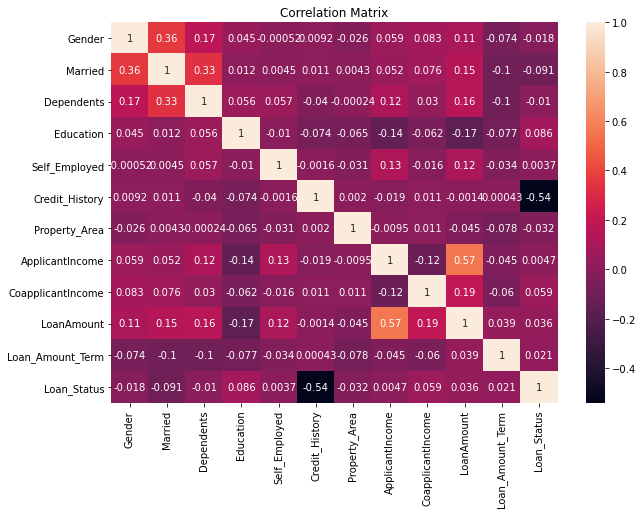

In [35]:
plt.figure(figsize=(10,7))
plt.title("Correlation Matrix")
sns.heatmap(Loan_data.corr(),annot=True,)

**Modelling**

For the process of modelling we have to first split the data into Train and Test data .

In [37]:
from sklearn.model_selection import train_test_split
X=pd.concat([cateagorical_data,Numerical_data],axis=1)
Y=Label

Here we can see that we have done the 70% train and 30% split.

In [38]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=28)

Now we wil import the models we want to use:

* LogisticRegression

* KNeighborsClassifier

* DecisionTreeClassifier

* RandomForestClassifier

* AdaBoostClassifier

Notice that we have kept the random see to 28 so that every time we run it, selects the same randomness and we get the same output.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

models={"LogisticRegression":LogisticRegression(random_state=28),
        "KNeighborsClassifier":KNeighborsClassifier(),
        "DecisionTreeClassifier":DecisionTreeClassifier(max_depth=1,random_state=28),
        "RandomForestClassifier":RandomForestClassifier(n_estimators=400,oob_score=True,random_state=28,n_jobs=-1),
        "AdaBoostClassifier":AdaBoostClassifier(random_state=28)
        }

Now models have been built we,will like to see how well they perform for that we are suing the 2 score.

* precision_score

* accuracy_score

In [40]:
from sklearn.metrics import precision_score,accuracy_score

def loss(y_true,y_pred,retu=False):
  pre=precision_score(y_true,y_pred)
  acc=accuracy_score(y_true,y_pred)


  if retu:
    return pre,acc
  else:
      print(' pre: %.3f\n  acc: %.3f\n '%(pre,acc))

At last we will print the accucracy of all the models.

In [41]:
def train_pred_score(models,x,y):
  for name,model in models.items():
    print(name," :")
    model.fit(x,y)
    loss(y,model.predict(x))
    print("-"*30)

train_pred_score(models,x_train,y_train)

LogisticRegression  :
 pre: 0.862
  acc: 0.800
 
------------------------------
KNeighborsClassifier  :
 pre: 0.641
  acc: 0.732
 
------------------------------
DecisionTreeClassifier  :
 pre: 0.877
  acc: 0.790
 
------------------------------
RandomForestClassifier  :
 pre: 1.000
  acc: 1.000
 
------------------------------
AdaBoostClassifier  :
 pre: 0.911
  acc: 0.862
 
------------------------------


**Form the various model we have plot here we can see that AdaBoostClassifier is performing the best as ,it is classifying all the Data points which were not classified in the first stumps and so on.**


We could do a ensemble modelling to (votting) but as our model reached 91% it not recommended to do ensemble,you can try in will enventually will decrease the accuracy.